### What is scikit-learn?

###### A Python library for machine learning built on top of NumPy, SciPy, and matplotlib.  
Provides simple and efficient tools for: 
        Classification (Spam detection, disease prediction, etc.)  
        Regression (House price prediction, stock prediction)  
        Clustering (Customer segmentation, grouping)  
        Dimensionality reduction (PCA)  
        Model selection (Cross-validation, hyperparameter tuning)  
        Preprocessing (Scaling, encoding)

## Linear Regression

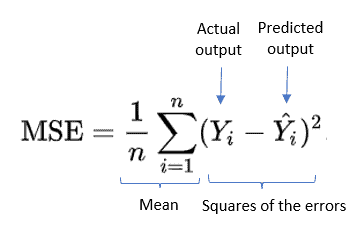

True underlying coefficients (unknown in real problems):
feature_1:  85.911176
feature_2:  50.005826
feature_3:  22.065106
feature_4:  25.619151
feature_5:  67.489320
feature_6:  13.812529

=== Test Metrics ===
R^2:  0.9912
MAE:  8.7553
RMSE: 11.2283

=== 5-Fold Cross-Validated R^2 ===
Fold 1: 0.9912
Fold 2: 0.9922
Fold 3: 0.9898
Fold 4: 0.9898
Fold 5: 0.9905
Mean R^2: 0.9907  |  Std: 0.0009

=== Coefficients ===
   feature_1:  86.160290
   feature_2:  49.236389
   feature_3:  22.459391
   feature_4:  25.090306
   feature_5:  67.258989
   feature_6:  12.968456
   intercept: -0.800179


C:\Users\Sandesh Khatiwada\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


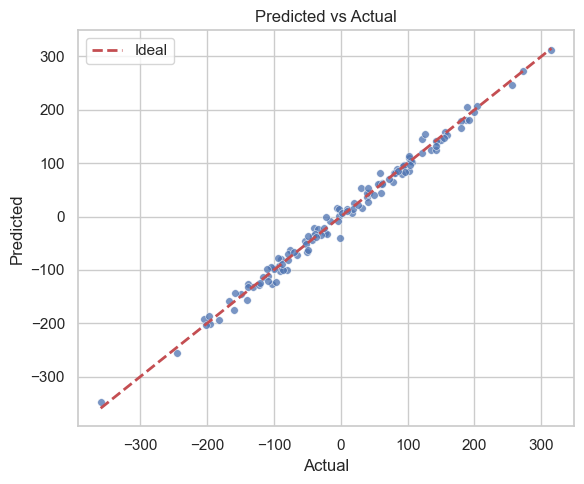

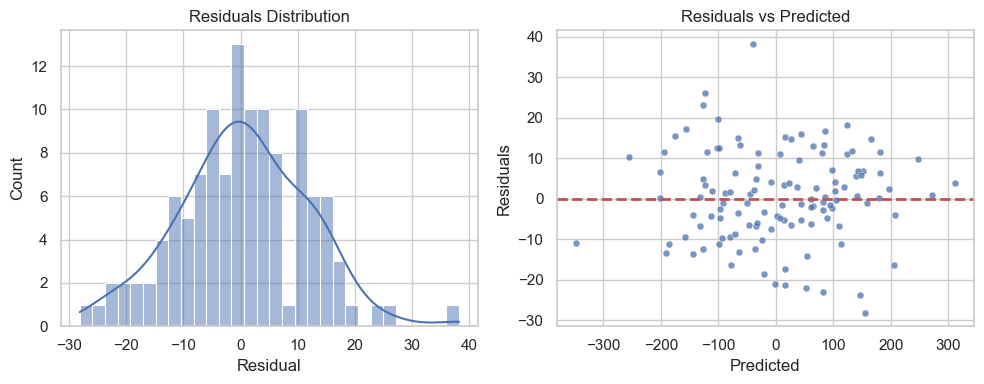

In [1]:
"""
Linear Regression with scikit-learn
- Generates a synthetic regression dataset
- Trains/test-splits, fits LinearRegression
- Evaluates with R^2, MAE, RMSE and cross-validation
- Produces diagnostic plots: Predicted vs Actual and Residuals
Dependencies: numpy, pandas, scikit-learn, matplotlib, seaborn
Install: pip install numpy pandas scikit-learn matplotlib seaborn
"""
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


def load_data(n_samples=600, n_features=6, noise=12.0, random_state=42):
    X, y, true_coef = make_regression(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_features,
        noise=noise,
        coef=True,
        random_state=random_state,
    )
    df = pd.DataFrame(X, columns=[f"feature_{i+1}" for i in range(n_features)])
    df["target"] = y
    return df, true_coef


def train_and_evaluate(df, test_size=0.2, random_state=42, do_plots=True):
    features = [c for c in df.columns if c != "target"]
    X = df[features].values
    y = df["target"].values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Cross-validated R^2
    cv = KFold(n_splits=5, shuffle=True, random_state=random_state)
    cv_scores = cross_val_score(model, X, y, scoring="r2", cv=cv)

    print("=== Test Metrics ===")
    print(f"R^2:  {r2:,.4f}")
    print(f"MAE:  {mae:,.4f}")
    print(f"RMSE: {rmse:,.4f}")

    print("\n=== 5-Fold Cross-Validated R^2 ===")
    for i, s in enumerate(cv_scores, 1):
        print(f"Fold {i}: {s:,.4f}")
    print(f"Mean R^2: {cv_scores.mean():,.4f}  |  Std: {cv_scores.std():,.4f}")

    print("\n=== Coefficients ===")
    for name, coef in zip(features, model.coef_):
        print(f"{name:>12}: {coef: .6f}")
    print(f"{'intercept':>12}: {model.intercept_: .6f}")

    if do_plots:
        sns.set(style="whitegrid", context="notebook")

        # Predicted vs Actual
        plt.figure(figsize=(6, 5))
        sns.scatterplot(x=y_test, y=y_pred, s=30, alpha=0.75)
        min_val = min(y_test.min(), y_pred.min())
        max_val = max(y_test.max(), y_pred.max())
        plt.plot([min_val, max_val], [min_val, max_val], "r--", lw=2, label="Ideal")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.title("Predicted vs Actual")
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Residuals
        residuals = y_test - y_pred
        fig, ax = plt.subplots(1, 2, figsize=(10, 4))
        sns.histplot(residuals, bins=30, kde=True, ax=ax[0])
        ax[0].set_title("Residuals Distribution")
        ax[0].set_xlabel("Residual")

        sns.scatterplot(x=y_pred, y=residuals, s=25, alpha=0.75, ax=ax[1])
        ax[1].axhline(0, color="r", linestyle="--", lw=2)
        ax[1].set_title("Residuals vs Predicted")
        ax[1].set_xlabel("Predicted")
        ax[1].set_ylabel("Residuals")
        plt.tight_layout()
        plt.show()

    return model


if __name__ == "__main__":
    df, true_coef = load_data()
    print("True underlying coefficients (unknown in real problems):")
    for i, c in enumerate(true_coef, 1):
        print(f"feature_{i}: {c: .6f}")
    print()
    _ = train_and_evaluate(df)

## Logistic Regression

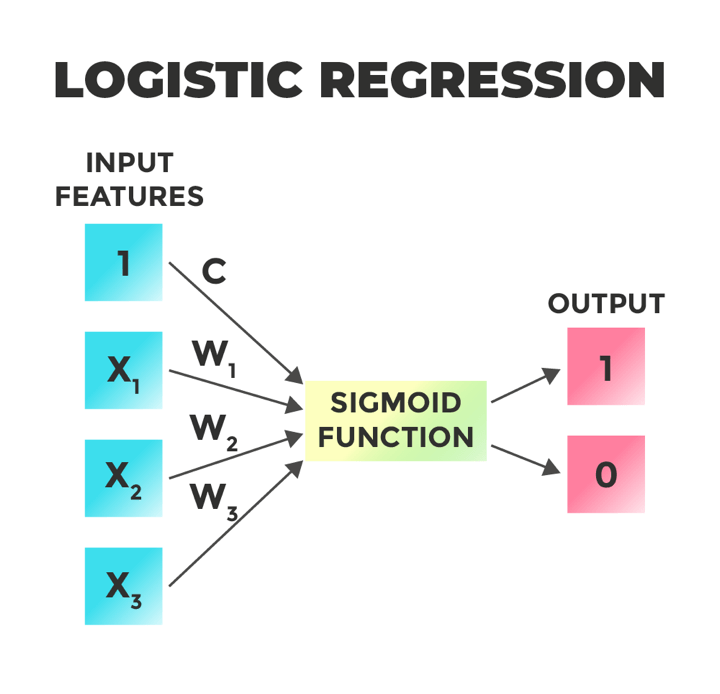!